Korelasi Faktor terhadap Impulse Buying (Urutan Kekuatan):
Impulse_Buying    1.000000
Trust             0.438288
Lifestyle         0.415406
Hedonic           0.389598
Scarcity          0.347992
Serendipity       0.306583
Presentation      0.190904
Name: Impulse_Buying, dtype: float64


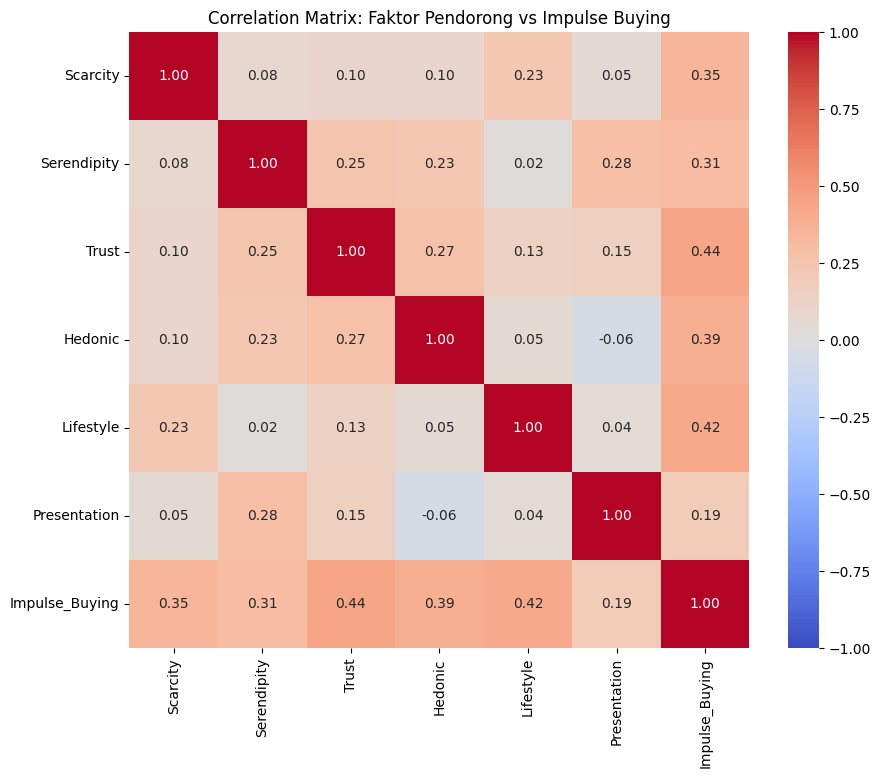

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_excel('Raw data_Impulse buying behavior.xlsx')
except FileNotFoundError:
    # Fallback if file isn't found in current directory, though it should be based on context
    print("File not found. Please ensure 'Raw data_Impulse buying behavior.xlsx' is available.")
    # Creating a dummy dataframe for demonstration if file is missing (not expected in this flow)
    # data = {'SC1': [1,2], 'SC2': [1,2], 'OIB1': [3,4], 'OIB2': [3,4]}
    # df = pd.DataFrame(data)

# 1. Feature Engineering: Membuat Variabel Agregat (Mean)
# Variabel Independen (X) - Faktor Pendorong
df['Scarcity'] = df[['SC1', 'SC2', 'SC3', 'SC4']].mean(axis=1)
df['Serendipity'] = df[['SI1', 'SI2', 'SI3', 'SI4', 'SI5']].mean(axis=1)
df['Trust'] = df[['TR1', 'TR2', 'TR3', 'TR4', 'TR5']].mean(axis=1)
df['Hedonic'] = df[['HM1', 'HM2', 'HM3']].mean(axis=1)
df['Lifestyle'] = df[['SL1', 'SL2', 'SL3', 'SL4']].mean(axis=1)
df['Presentation'] = df[['PP1', 'PP2', 'PP3', 'PP4']].mean(axis=1)

# Variabel Dependen (Y) - Target
df['Impulse_Buying'] = df[['OIB1', 'OIB2', 'OIB3']].mean(axis=1)

# Memilih kolom agregat untuk analisis korelasi
aggregate_cols = ['Scarcity', 'Serendipity', 'Trust', 'Hedonic', 
                  'Lifestyle', 'Presentation', 'Impulse_Buying']
correlation_df = df[aggregate_cols]

# 2. Menghasilkan Matriks Korelasi
correlation_matrix = correlation_df.corr()

# Menampilkan nilai korelasi terhadap Target (Impulse_Buying)
print("Korelasi Faktor terhadap Impulse Buying (Urutan Kekuatan):")
print(correlation_matrix['Impulse_Buying'].sort_values(ascending=False))

# Visualisasi Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix: Faktor Pendorong vs Impulse Buying')
plt.show()

In [6]:
import pandas as pd

# Load the dataset if not already loaded
try:
    df = pd.read_excel('Raw data_Impulse buying behavior.xlsx')
except FileNotFoundError:
    print("Error: 'Raw data_Impulse buying behavior.xlsx' not found.")
    raise

# Memeriksa jumlah nilai yang hilang (missing value) di setiap kolom
missing_values = df.isnull().sum()
print("Jumlah Missing Value per Kolom:")
print(missing_values[missing_values > 0]) 

# Jika output kosong, berarti tidak ada missing value
if missing_values.sum() == 0:
    print("\n✅ Data bersih: Tidak ditemukan missing value.")
else:
    print(f"\n⚠️ Ditemukan total {missing_values.sum()} missing value.")

Jumlah Missing Value per Kolom:
Series([], dtype: int64)

✅ Data bersih: Tidak ditemukan missing value.


Cluster Profiles (Mean Scores of Factors and Impulse Buying):
         Scarcity  Serendipity  Trust  Hedonic  Lifestyle  Presentation  \
Cluster                                                                   
1            4.27         4.14   4.09     4.25       4.25          4.12   
0            3.38         4.15   3.46     3.69       3.30          4.18   
2            3.77         3.28   3.23     3.49       3.80          3.45   

         Impulse_Buying  
Cluster                  
1                  4.22  
0                  3.63  
2                  3.62  


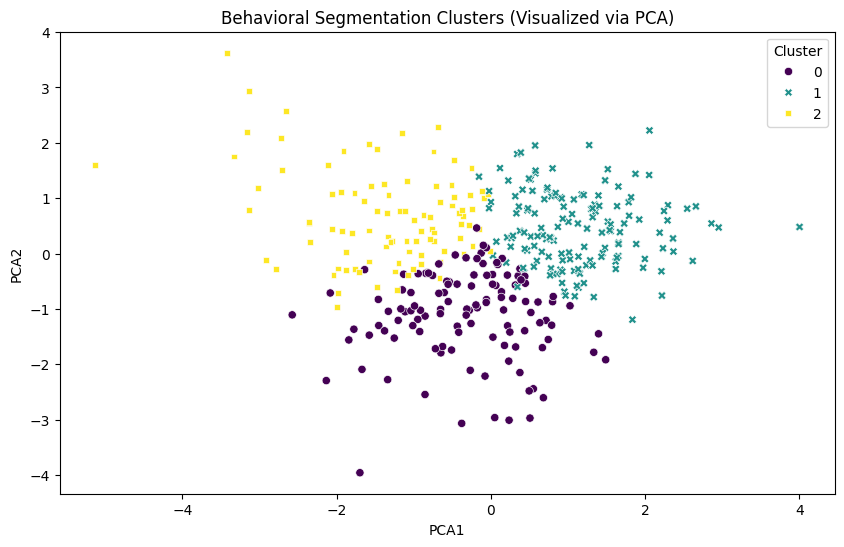

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feature Engineering: Create Aggregated Mean Scores
df['Scarcity'] = df[['SC1', 'SC2', 'SC3', 'SC4']].mean(axis=1)
df['Serendipity'] = df[['SI1', 'SI2', 'SI3', 'SI4', 'SI5']].mean(axis=1)
df['Trust'] = df[['TR1', 'TR2', 'TR3', 'TR4', 'TR5']].mean(axis=1)
df['Hedonic'] = df[['HM1', 'HM2', 'HM3']].mean(axis=1)
df['Lifestyle'] = df[['SL1', 'SL2', 'SL3', 'SL4']].mean(axis=1)
df['Presentation'] = df[['PP1', 'PP2', 'PP3', 'PP4']].mean(axis=1)
df['Impulse_Buying'] = df[['OIB1', 'OIB2', 'OIB3']].mean(axis=1)

# 2. Behavioral Segmentation (K-Means)
fa_vars = ['Scarcity', 'Serendipity', 'Trust', 'Hedonic', 'Lifestyle', 'Presentation']
X_segment = df[fa_vars].dropna()

# Standardize data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_segment)

# Perform clustering (using n_clusters=3 from the previous exploration)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 3. Cluster Profiling: Calculate mean scores of factors and Impulse Buying by Cluster
cluster_profile = df.groupby('Cluster')[fa_vars + ['Impulse_Buying']].mean().sort_values(by='Impulse_Buying', ascending=False)
print("Cluster Profiles (Mean Scores of Factors and Impulse Buying):")
print(cluster_profile.round(2))

# 4. Visualization (PCA for 2D plot)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', style='Cluster')
plt.title('Behavioral Segmentation Clusters (Visualized via PCA)')
plt.show()

In [3]:
import pandas as pd

# Load the dataset and re-create aggregated columns/cluster column
try:
    df = pd.read_excel('Raw data_Impulse buying behavior.xlsx')
except FileNotFoundError:
    print("Error: 'Raw data_Impulse buying behavior.xlsx' not found. Cannot proceed with segmentation.")
    raise

# 1. Feature Engineering (Required for the Cluster column)
# Re-create mean factor scores for K-Means consistency
df['Scarcity'] = df[['SC1', 'SC2', 'SC3', 'SC4']].mean(axis=1)
df['Serendipity'] = df[['SI1', 'SI2', 'SI3', 'SI4', 'SI5']].mean(axis=1)
df['Trust'] = df[['TR1', 'TR2', 'TR3', 'TR4', 'TR5']].mean(axis=1)
df['Hedonic'] = df[['HM1', 'HM2', 'HM3']].mean(axis=1)
df['Lifestyle'] = df[['SL1', 'SL2', 'SL3', 'SL4']].mean(axis=1)
df['Presentation'] = df[['PP1', 'PP2', 'PP3', 'PP4']].mean(axis=1)

# Run K-Means again to ensure 'Cluster' column is present
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
cluster_features = ['Scarcity', 'Serendipity', 'Trust', 'Hedonic', 'Lifestyle', 'Presentation']
X = df[cluster_features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


# 2. Demographic Mapping
gender_map = {0: 'Female', 1: 'Male'}
df['Gender_Label'] = df['Q2_GENDER'].map(gender_map)

# 3. Cross-Tabulation: Gender Distribution by Cluster
# Calculate the percentage distribution of gender within each cluster
gender_distribution = pd.crosstab(
    df['Cluster'], 
    df['Gender_Label'], 
    normalize='index'
).mul(100).round(2)

print("Percentage Distribution of Gender by Cluster:")
print(gender_distribution)

Percentage Distribution of Gender by Cluster:
Gender_Label  Female   Male
Cluster                    
0              60.17  39.83
1              62.84  37.16
2              74.74  25.26


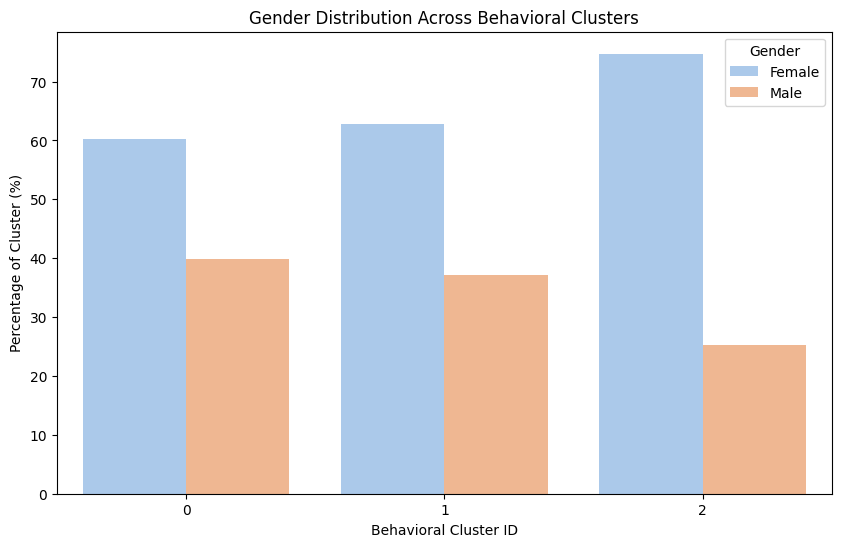

Gender Distribution Table (Percentage within each cluster):
Gender_Label  Female   Male
Cluster                    
0              60.17  39.83
1              62.84  37.16
2              74.74  25.26


In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's still accessible as 'df')
df = pd.read_excel('Raw data_Impulse buying behavior.xlsx')

# 1. Feature Engineering: Create the aggregated mean scores
df['Scarcity'] = df[['SC1', 'SC2', 'SC3', 'SC4']].mean(axis=1)
df['Serendipity'] = df[['SI1', 'SI2', 'SI3', 'SI4', 'SI5']].mean(axis=1)
df['Trust'] = df[['TR1', 'TR2', 'TR3', 'TR4', 'TR5']].mean(axis=1)
df['Hedonic'] = df[['HM1', 'HM2', 'HM3']].mean(axis=1)
df['Lifestyle'] = df[['SL1', 'SL2', 'SL3', 'SL4']].mean(axis=1)
df['Presentation'] = df[['PP1', 'PP2', 'PP3', 'PP4']].mean(axis=1)

# Prepare data for Clustering and Scaling
cluster_features = ['Scarcity', 'Serendipity', 'Trust', 'Hedonic', 'Lifestyle', 'Presentation']
X = df[cluster_features].dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Perform K-Means Clustering (n_clusters=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 3. Demographic Profiling: Gender Distribution per Cluster
gender_map = {0: 'Female', 1: 'Male'}
df['Gender_Label'] = df['Q2_GENDER'].map(gender_map)

# Calculate percentage distribution of gender within each cluster
gender_distribution = df.groupby('Cluster')['Gender_Label'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Plotting the Gender Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Percentage', hue='Gender_Label', data=gender_distribution, palette='pastel')
plt.title('Gender Distribution Across Behavioral Clusters')
plt.ylabel('Percentage of Cluster (%)')
plt.xlabel('Behavioral Cluster ID')
plt.legend(title='Gender')
plt.show()

# Display the raw percentage data
print("Gender Distribution Table (Percentage within each cluster):")
print(gender_distribution.pivot(index='Cluster', columns='Gender_Label', values='Percentage').round(2))

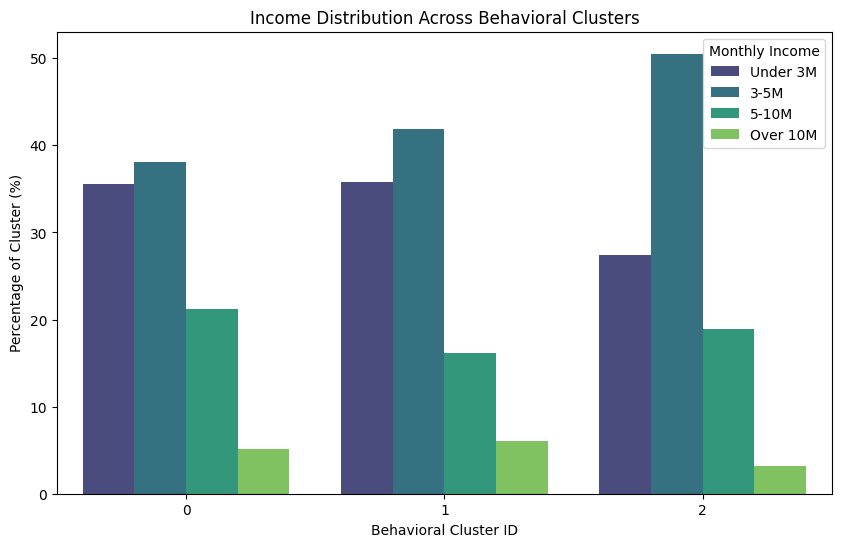

Income Distribution Table (Percentage within each cluster):
Income_Label  Under 3M   3-5M  5-10M  Over 10M
Cluster                                       
0                35.59  38.14  21.19      5.08
1                35.81  41.89  16.22      6.08
2                27.37  50.53  18.95      3.16


In [5]:
# 1. Demographic Profiling: Income Distribution per Cluster
income_map = {1: 'Under 3M', 2: '3-5M', 3: '5-10M', 4: 'Over 10M'}
df['Income_Label'] = df['Q4_INCOME'].map(income_map)

# Calculate percentage distribution of income within each cluster
income_distribution = df.groupby('Cluster')['Income_Label'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Plotting the Income Distribution
plt.figure(figsize=(10, 6))
# Ensure income categories are ordered correctly for the plot
income_order = ['Under 3M', '3-5M', '5-10M', 'Over 10M']
sns.barplot(x='Cluster', y='Percentage', hue='Income_Label', data=income_distribution, palette='viridis', hue_order=income_order)
plt.title('Income Distribution Across Behavioral Clusters')
plt.ylabel('Percentage of Cluster (%)')
plt.xlabel('Behavioral Cluster ID')
plt.legend(title='Monthly Income', loc='upper right')
plt.show()

# Display the raw percentage data (pivot table)
print("Income Distribution Table (Percentage within each cluster):")
income_pivot = income_distribution.pivot(index='Cluster', columns='Income_Label', values='Percentage').fillna(0).round(2)
# Reorder columns for display
print(income_pivot[income_order])

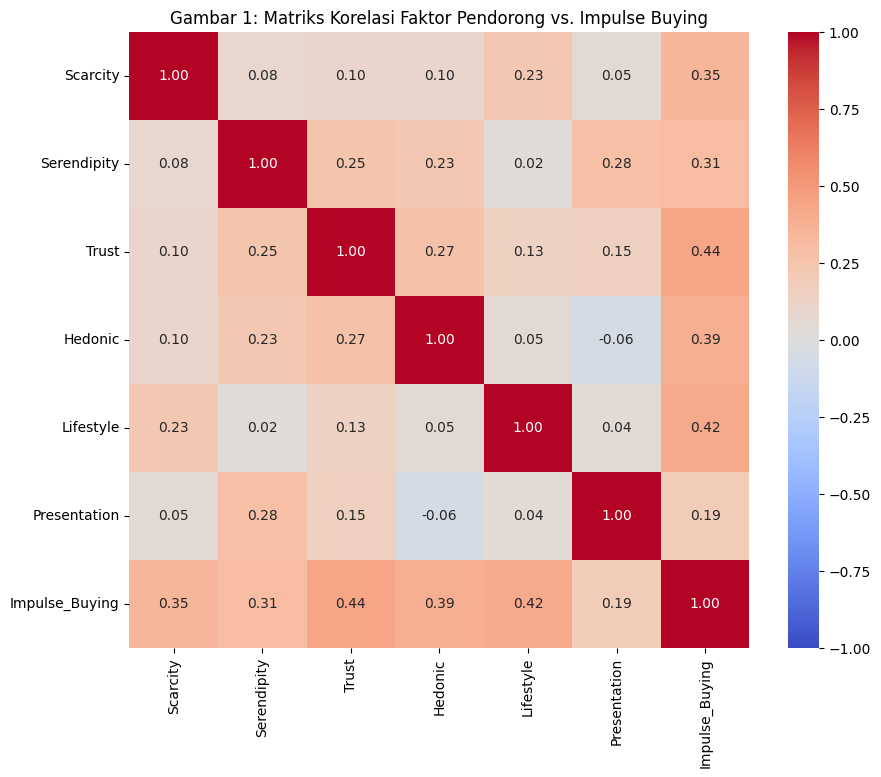

C:\Users\invas\AppData\Local\Temp\ipykernel_21160\4179180787.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Q2_GENDER', y='Impulse_Buying', data=df, palette='pastel')


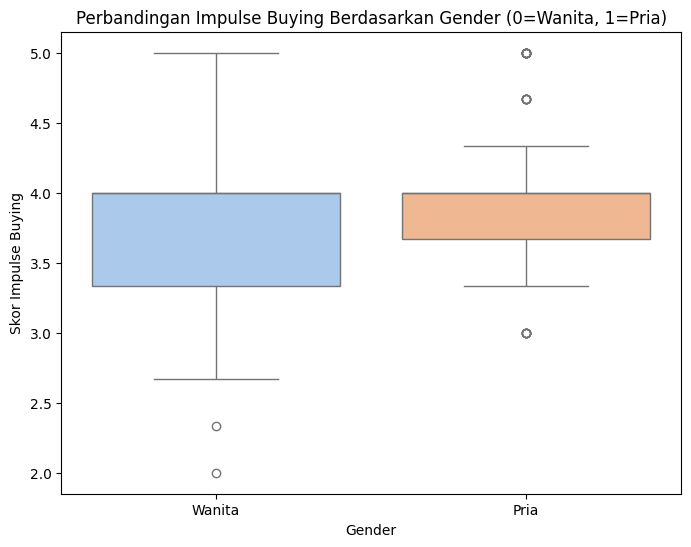

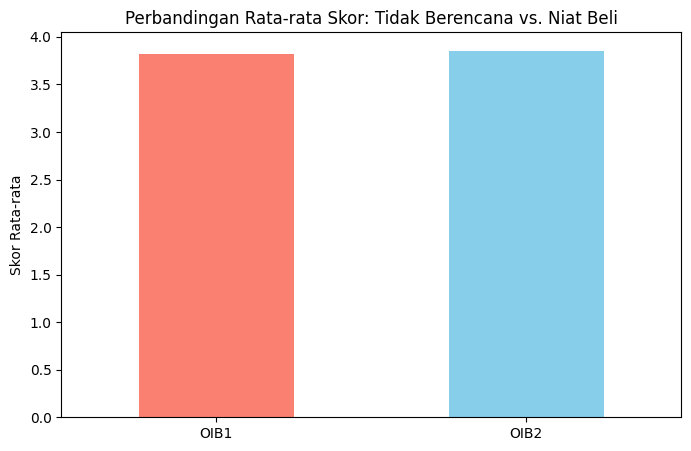

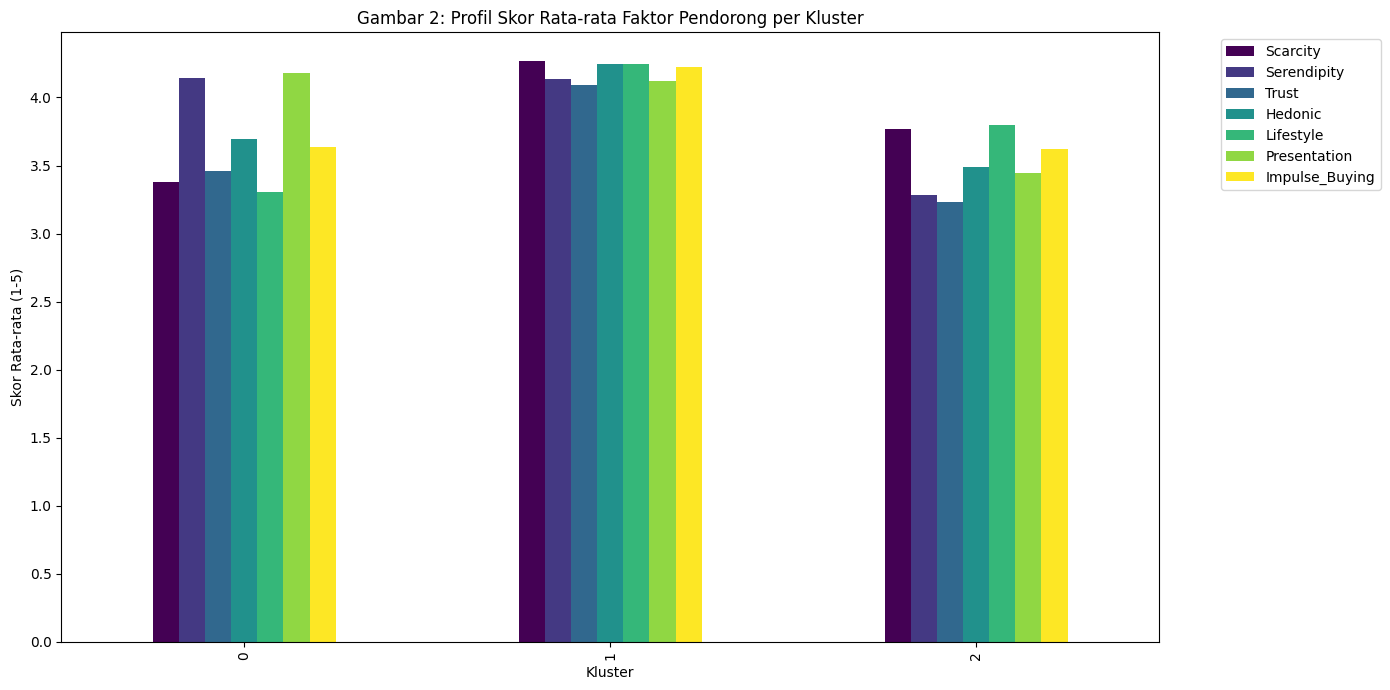

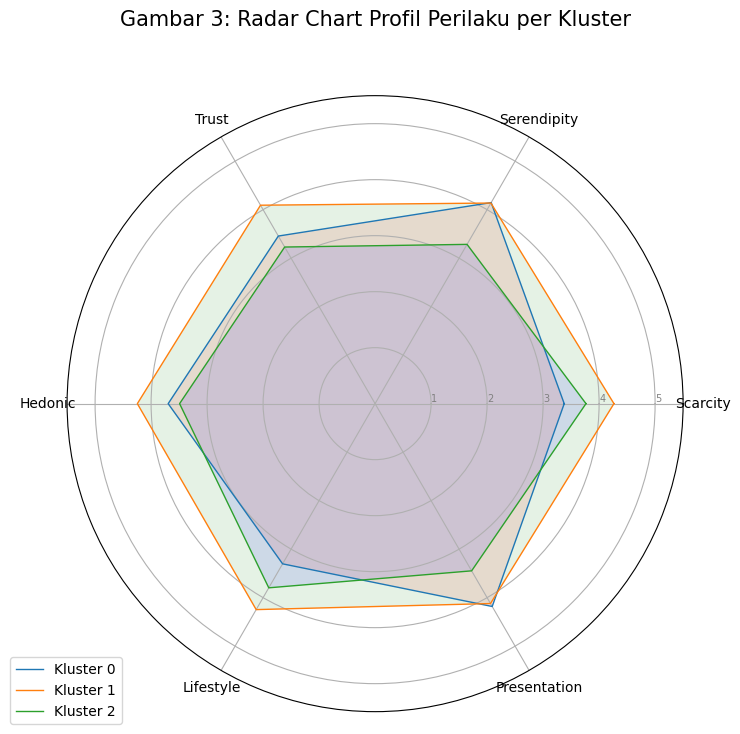

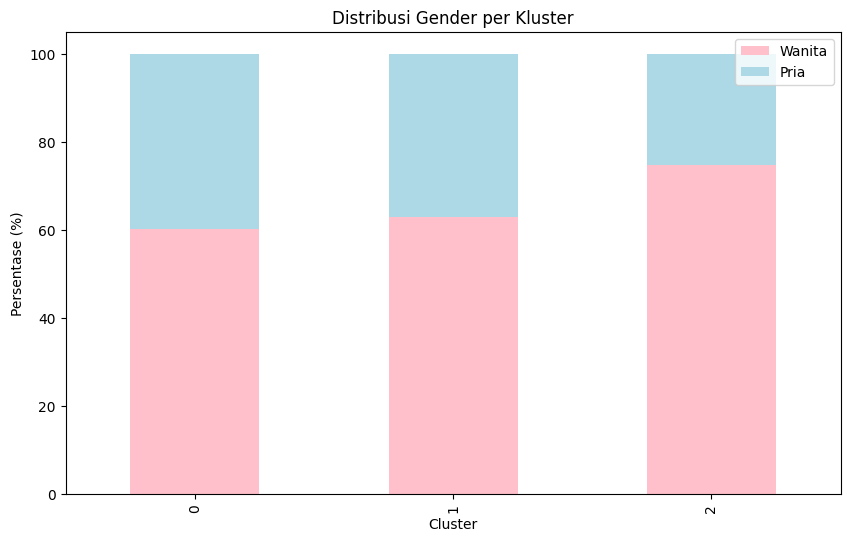

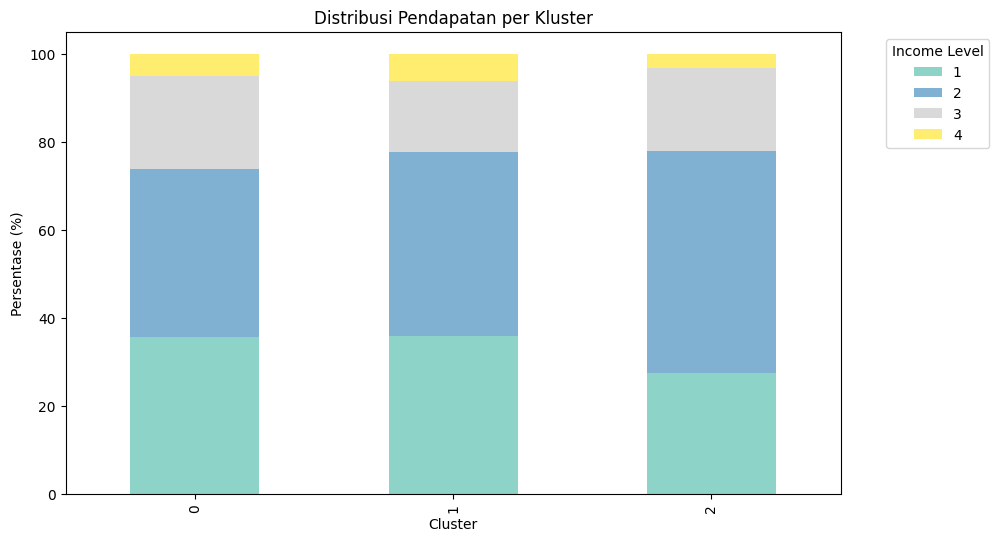

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from math import pi

# --- 1. DATA PREPARATION ---
# Load Data (Pastikan file excel berada di folder yang sama)
try:
    df = pd.read_excel('Raw data_Impulse buying behavior.xlsx')
except FileNotFoundError:
    # Dummy data untuk demonstrasi jika file tidak ada
    print("⚠️ File asli tidak ditemukan. Menggunakan dummy data untuk demonstrasi kode.")
    np.random.seed(42)
    data = np.random.randint(1, 6, size=(361, 32))
    cols = [f"{c}{i}" for c in ['SC','SI','TR','HM','SL','PP'] for i in range(1,6)] + ['OIB1','OIB2','OIB3']
    df = pd.DataFrame(data[:, :28], columns=cols[:28])
    df['Q2_GENDER'] = np.random.randint(0, 2, 361)
    df['Q4_INCOME'] = np.random.randint(1, 5, 361)
    df['Q3_SCHOOL'] = np.random.randint(1, 9, 361)
    df['Q1_PROVINCE/CITY'] = np.random.choice(['Jakarta', 'Bandung', 'Surabaya'], 361)


# Feature Engineering (Agregasi Variabel Laten)
df['Scarcity'] = df[['SC1', 'SC2', 'SC3', 'SC4']].mean(axis=1)
df['Serendipity'] = df[['SI1', 'SI2', 'SI3', 'SI4', 'SI5']].mean(axis=1)
df['Trust'] = df[['TR1', 'TR2', 'TR3', 'TR4', 'TR5']].mean(axis=1)
df['Hedonic'] = df[['HM1', 'HM2', 'HM3']].mean(axis=1)
df['Lifestyle'] = df[['SL1', 'SL2', 'SL3', 'SL4']].mean(axis=1)
df['Presentation'] = df[['PP1', 'PP2', 'PP3', 'PP4']].mean(axis=1)
df['Impulse_Buying'] = df[['OIB1', 'OIB2', 'OIB3']].mean(axis=1)

# --- 2. VISUALISASI BAB 2 (DATA UNDERSTANDING) ---

# Gambar 1: Matriks Korelasi
plt.figure(figsize=(10, 8))
factors = ['Scarcity', 'Serendipity', 'Trust', 'Hedonic', 'Lifestyle', 'Presentation', 'Impulse_Buying']
corr_matrix = df[factors].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Gambar 1: Matriks Korelasi Faktor Pendorong vs. Impulse Buying')
plt.show()

# Gambar (Tambahan): Boxplot Gender vs Impulse Buying
plt.figure(figsize=(8, 6))
sns.boxplot(x='Q2_GENDER', y='Impulse_Buying', data=df, palette='pastel')
plt.title('Perbandingan Impulse Buying Berdasarkan Gender (0=Wanita, 1=Pria)')
plt.xlabel('Gender')
plt.ylabel('Skor Impulse Buying')
plt.xticks([0, 1], ['Wanita', 'Pria'])
plt.show()

# Gambar (Tambahan): Grafik Pembelian Terencana vs Impulsif
# Asumsi: OIB1 (Tidak Berencana) vs OIB2 (Berencana/Niat Beli) - *Contoh Interpretasi
planned_vs_unplanned = df[['OIB1', 'OIB2']].mean()
plt.figure(figsize=(8, 5))
planned_vs_unplanned.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Perbandingan Rata-rata Skor: Tidak Berencana vs. Niat Beli')
plt.ylabel('Skor Rata-rata')
plt.xticks(rotation=0)
plt.show()


# --- 3. VISUALISASI BAB 4 (MODELLING - CLUSTERING) ---

# Persiapan Clustering
cluster_features = ['Scarcity', 'Serendipity', 'Trust', 'Hedonic', 'Lifestyle', 'Presentation']
X = df[cluster_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Gambar 2: Profil Skor Rata-rata per Kluster (Bar Chart)
cluster_means = df.groupby('Cluster')[cluster_features + ['Impulse_Buying']].mean()
cluster_means.plot(kind='bar', figsize=(14, 7), colormap='viridis')
plt.title('Gambar 2: Profil Skor Rata-rata Faktor Pendorong per Kluster')
plt.ylabel('Skor Rata-rata (1-5)')
plt.xlabel('Kluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gambar 3: Radar Chart (Profil Kluster)
# Fungsi untuk membuat Radar Chart
def make_radar_chart(df_means, title):
    categories = list(df_means.columns)
    N = len(categories)
    
    # Sudut untuk setiap sumbu
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Menutup loop grafik
    
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    
    # Setup sumbu
    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ["1","2","3","4","5"], color="grey", size=7)
    plt.ylim(0, 5.5)
    
    # Plot setiap kluster
    colors = ['r', 'g', 'b']
    for i, row in df_means.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Kluster {i}')
        ax.fill(angles, values, colors[i], alpha=0.1)
        
    plt.title(title, size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

# Memanggil fungsi Radar Chart untuk data Kluster (Tanpa Impulse Buying agar skala sebanding)
make_radar_chart(cluster_means[cluster_features], 'Gambar 3: Radar Chart Profil Perilaku per Kluster')

# Gambar 4: Analisis Demografi (Gender & Income per Kluster)
# Gender
gender_dist = df.groupby('Cluster')['Q2_GENDER'].value_counts(normalize=True).unstack() * 100
gender_dist.plot(kind='bar', stacked=True, color=['pink', 'lightblue'], figsize=(10, 6))
plt.title('Distribusi Gender per Kluster')
plt.ylabel('Persentase (%)')
plt.legend(['Wanita', 'Pria'])
plt.show()

# Income
income_dist = df.groupby('Cluster')['Q4_INCOME'].value_counts(normalize=True).unstack() * 100
income_dist.plot(kind='bar', stacked=True, colormap='Set3', figsize=(10, 6))
plt.title('Distribusi Pendapatan per Kluster')
plt.ylabel('Persentase (%)')
plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()